<a href="https://colab.research.google.com/github/marekpiotradamczyk/ml_uwr_23/blob/master/Lectures/07-notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning @ UWr 2023

**Lecture 7**
$\def\R{{\mathbb R}} \def\i{^{(i)}} \def\sjt{\mathrm{s.t. }\ }$

In the last lecture notes we have dived into the world of unsupervised learning with K-Means, the easiest clustering algorithm. We have seen how K-Means can be used to group data into clusters. However, this task also had a different interpretation: how to learn a lossy compression of the data, by encoding each datapoint by its cluster ID. In fact, we have seen an interpretation of K-Means in which the data matrix $X$ was approximated by a product of two matrices:

$$
X \approx C\mu
$$

where $C$ is a 1-hot encoding of cluster inidces, and $\mu$ is the matrix of cluster means.

In today's lecture we will learn about PCA - an algorithm that finds the principal directions of variation in a dataset. However, we will also see how it can be intepreted as learning a factorization of the data matrix


Let's start with the main intuiton about PCA. Consider the set of 2D points pictured below:

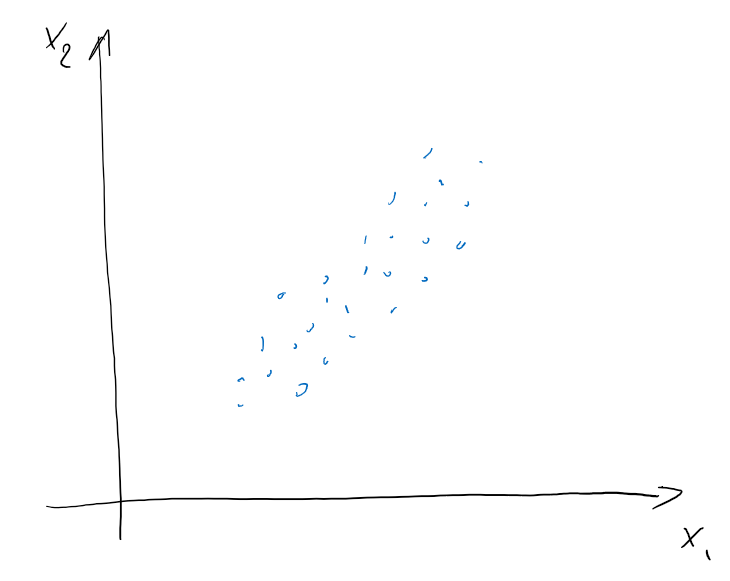

We can see that while the data is 2D, the shape of the data cloud is elongated in one direction. If we replaced each data point with its location on the line, we would preserve most of information in the data, while making the representation simpler (1D instead of 2D).

Finding this direction is the main idea of the PCA (Principal Componenets Analysis) transformation. Before we mathematically derive the PCA, lets intuitively see how it will transform the above data:

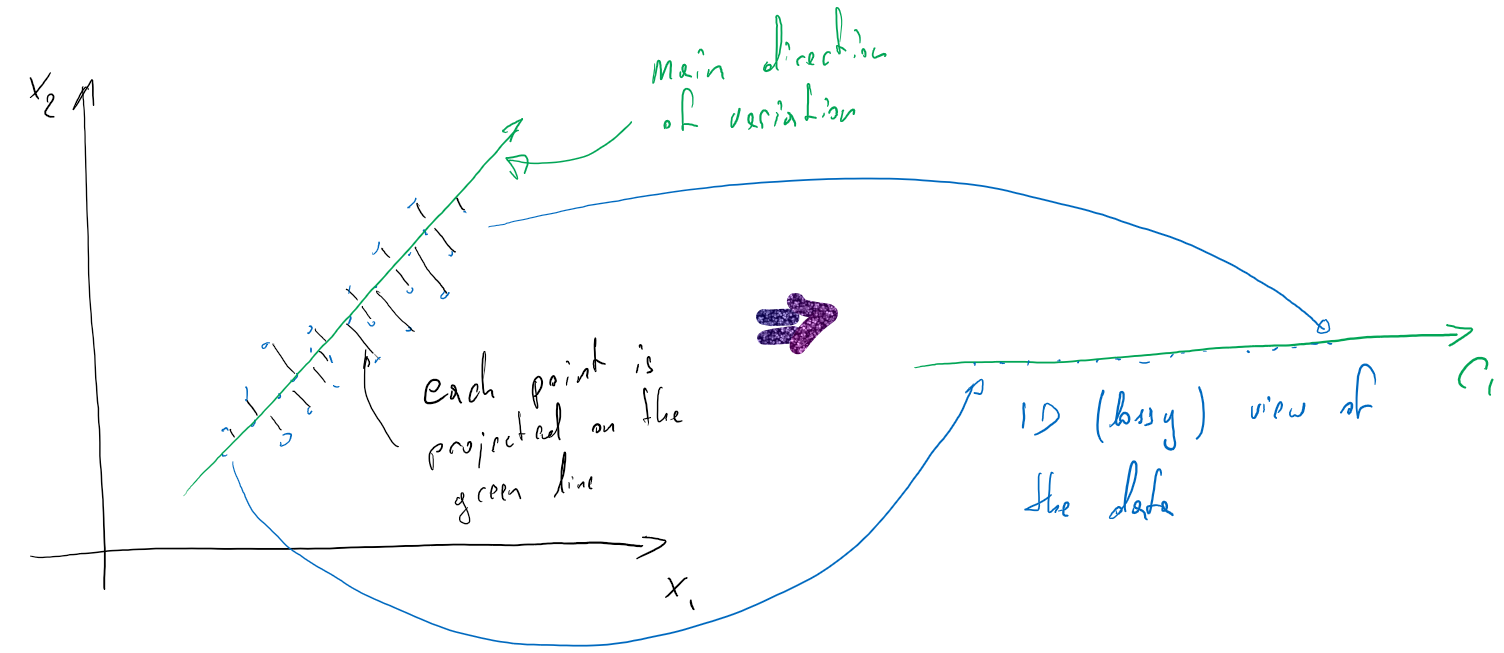

## The mathematics of PCA

Suppose we are given a dataset in the form of a data matrix $X\in\R^{N\times D}$ where $N$ is the number of data samples, and $D$ is the dimensionality of the data. 

> a note on notation: to stay consistent with the rest of the course, we assume that each sample is a _row_ of the data matrix. Most PCA derivations assume data is arranged by coumns. Pay attention to shapes and transpositions.

We want to find a vector $v\in\R^{D\times 1}$ ($v$ is a column vector, or equvalently a direction in data space) such that the projection of the data onto $v$, computed as $Xv$, will preserve the most variability of the data. In other words, we want to find a direction, such that the variance of the projected data is maximized.

For simplicity, assume the data is centered, that is $\sum_{i=1}^{N} X^{(i)} = 0$ (centering the data just moves it around, the projection will also be shifted, but the _direction_ of the principal component will not be altered). Centering the data implies $Xv = 0$ as well. Then the variance of the projection is simply:

$$
\text{var}(Xv) = \frac{1}{N}(Xv)^T(Xv) = \frac{1}{N}v^TX^TXv = v^T S v
$$

where we defined $S = \frac{1}{N}X^TX \in\R^{D\times D}$ to be the _data covariance matrix_ (recall that $X$ is centered).

We wish to maximize the variance, with respect to the _direction_ of $v$, in other words, length of $v$ is irrelevant and we can fix $\|v\|=1$. Then, the 1D PCA problem is simply:

$$
\begin{align}
\underset{v}{\operatorname{argmax}}\; & \frac{1}{2}v^TSv \\
\sjt & v^Tv = 1
\end{align}
$$

where we have multiplied the objective by 1/2 for convenience.

We can solve this problem using the standard method of [Lagrange Multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier). First let's construct the Lagrangian:

$$
\mathcal{L} = \frac{1}{2}v^TSv - \lambda(v^Tv - 1)
$$

differentiating the lagrangian with respect to $v$ yields:

$$
\frac{\partial \mathcal{L}}{\partial v} = Sv - \lambda v
$$

At optimum $\frac{\partial \mathcal{L}}{\partial v} = 0$, or in other words $Sv = \lambda v$. This means that $v$ needs to be an eigenvector of $S$!


## Eigen-what!? A recap of eigenvectors and eigenvalues

To better understand the meaning of the equation $Sv = \lambda v$ we will now make a brief repetition of the mathematics of eigenvectors.

Suppose you have a square matrix $A\in\R^{D\times D}$. If you use this matrix to act on a vector $v$, that is if you multiply $Av$ you will get another vector. For most vectors multiplicaiton by $A$ changes their length and direction. However, for some vectors multiplicaiton by $A$ only scales them, retaining th original direction. These vectors are important, because they help to understand how $A$ acts on the space - which directions it shrinks or expands. The set of all vectors $v$ such that $Av$ is parallel to $v$ is called the set of eigenvectors of A. What are these vector? By their definition:

$$
Av = \lambda v = \lambda I v
$$
where $I$ is the identity matrix.

This gives us the following system of linear equations:
$$
(A-\lambda I)v = 0
$$

Intuitively, it has:
- a trivial solution $v=0$
- a nontrivial solution when $\det(A-\lambda I)=0$.

The determinant $\det(A-\lambda I)$ is a polynomial of degree $D$ of the variable $\lambda$. It thus has up to $D$ complex roots (solutions). Each root of the polynomial is called an eigenvalue of $A$.

### The case of real and symmetric A
While the eigenvalues $\lambda$, and consequently their corresponding eigenvectors $v$ may contain maginary components, for the special case of a **real and symmetric** matrix $A$ both eigenvector and eiven-values are real. This case is important for us, because the data correlation matrix $S$ is real and symmetric as well (we have $S^T = S$).

For two eigenvalues $\lambda_i$, and $\lambda_j$, together with their corresponding eigenvectors $v_i$ and $v_j$ we can show (and leave it to the exercises) that:

$$
(\lambda_i - \lambda_j)v_j^Tv_i = 0
$$

In other words, if two eigenvalues are different, their corresponding eigenvectors must be orthogonal! Morover, if the eigenvalues are equal, the vectors can be orthogonalized. This means, that all eigenvectors are pariwise orthogonal. Moreover, eigenvectors are just directions in space - we can fix their length to be 1. Lets arrange the eigenvectors into a matrix:
$$
V = [v_1, v_2, ..., v_D]
$$
where the i-th column of $V$ is the i-th eigenvector.

The matrix V is ortonormal (different columns are perpendicular to each other, length of each column is 1), that is:
$$
V^TV = [v_i^Tv_j]_{ij} = I
$$

which implies that $V^{-1} = V^T$.

### Eigendecomposition of a matrix

After concatenating all vectors $v$ into the matrix $V$, lets construct the diagonal matrix $\Lambda$ containing all eigen-values: $\Lambda_{ii} = \lambda_i,\; \Lambda_{ij}=0 \text{ if } i\neq j$. We can then jointly write all eigenvalue equations as:

$$
AV = V\Lambda
$$

Right-multiplying by $V^T$ we get:

$$
A = AVV^T = V\Lambda V^T
$$
because $VV^T = VV^{-1}=I$.

Thus, we can represent any real symmetric matrix $A$ as a product of its eigen-vectors scaled by their eigen-values.

Finallty, let's not that $V$ being an ortonormal matrix means that transforming the space using $V$ preserves length of vectors and th angle between them. This means, that using the eigenvectors of a matrix for a linear basis transformation is equivalent to a _rigid rotation_ of the space - there is no warping.

## Back to PCA - using eigen-decomposition to find pricipal components

As we have seen, the first principal direction is an eigenvector $v_i$ of the data covariance matrix $S$. However, which one it is? To find out, we must compute and maximize

$$
v_i^TSv_i
$$

Replacing $S$ by its eigendecomposition yields

$$
v_i^TSv_i = v_i^T V\Lambda V^T v_i = \lambda_i
$$

where we have ised the fact that $v_i^Tv_j = 1 \text{ if } i=j \text{ and } 0 \text{ otherwise}$.

Thus, the first principal component is the one correspinding to the larges eigenvalue, with the variance retained by the projection equal to the eigenvalue!

Having found the first principal component $v_1$, we can search for the next one in the space perpendicular to $v_1$. It can be shown that it will correspond to the eignvector with the second-largest eignvalue.

Thus, to find the $K\leq D$ first principal components of data one has to:
1. Center the data: $X\gets X - \mathbb{1}\bar{X}$ where $\bar{X}$ is the vector of mean feature values and $\mathbb{1}$ is a vector of ones.
2. Compute the eigen decomposition of $\frac{1}{N}X^TX$.
3. Construct the matrix $V_K = [v_1, v_2, ..., v_K]$ of $K$ first eigenvectors.
4. Project the data onto the eigenvectors: $X_K = X V_K$.

Let's see a demonstration!

In [22]:
import httpimport
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import sklearn.datasets
from scipy.stats import norm

sns.set_style("white")

with httpimport.github_repo(
    "janchorowski", "nn_assignments"
):
    from common.plotting import plot_mat

Let's generate some data first:

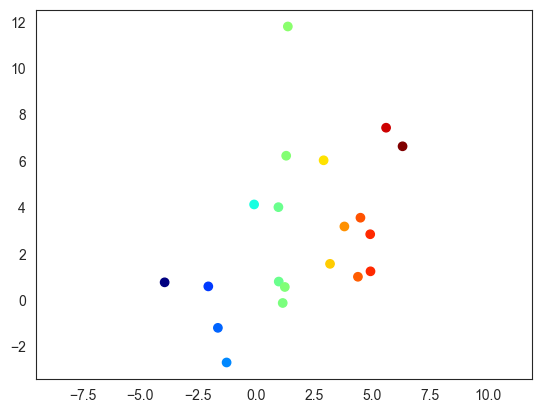

In [23]:
X = np.random.randn(20, 2) @ np.array([[1, 3], [3, 1]]) + [1.0, 1.0]
# color th edata to better see which points are projected to which by PCA
Xcolors = (X[:, 0] - min(X[:, 0])) / (max(X[:, 0]) - min(X[:, 0]))
Xcolors = plt.cm.jet(Xcolors)

plt.scatter(X[:, 0], X[:, 1], color=Xcolors)
_ = plt.axis("equal")

Now subtract the mean and normalize the data such that each dimension has unit variance

In [24]:
Xorig = np.array(X)
X -= X.mean(0, keepdims=True)

# This step is not needed, but we often want to normalize the data to 
# equalize the contribuition of all features to the total data variance.
# You comment it out and see what happens
X /= X.std(0, keepdims=True)

In [25]:
# Generate a dataset of points that lie on grid
xmin, xmax = np.floor(X.min(0)), np.ceil(X.max(0))
xg, yg = np.meshgrid(
    np.arange(xmin[0], xmax[0] + 0.5, 0.5), np.arange(xmin[1], xmax[1] + 0.5, 0.5)
)
mxg = np.hstack(
    (
        np.hstack((xg, np.zeros((xg.shape[0], 1)) + np.nan)).ravel(),
        np.hstack((xg.T, np.zeros((xg.shape[1], 1)) + np.nan)).ravel(),
    )
)
myg = np.hstack(
    (
        np.hstack((yg, np.zeros((yg.shape[0], 1)) + np.nan)).ravel(),
        np.hstack((yg.T, np.zeros((yg.shape[1], 1)) + np.nan)).ravel(),
    )
)
G = np.vstack((mxg, myg)).T

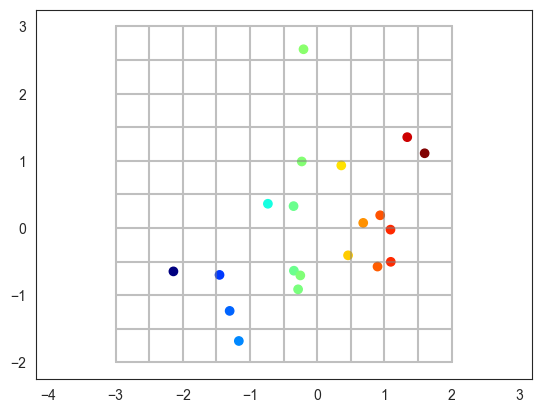

In [26]:
plt.plot(G[:, 0], G[:, 1], color="gray", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], color=Xcolors)
_ = plt.axis("equal")

In [27]:
# Compute the covariance matrix

S = 1.0 / X.shape[0] * X.T @ X
print(S)

[[1.         0.41726681]
 [0.41726681 1.        ]]


In [28]:
L, V = np.linalg.eig(S)
# reorder the eigenvalues by decreasing lambdas
eigorder = L.argsort()[::-1]
L = L[eigorder]
V = V[:, eigorder]
print("L=", L, "\nV=", V)

L= [1.41726681 0.58273319] 
V= [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


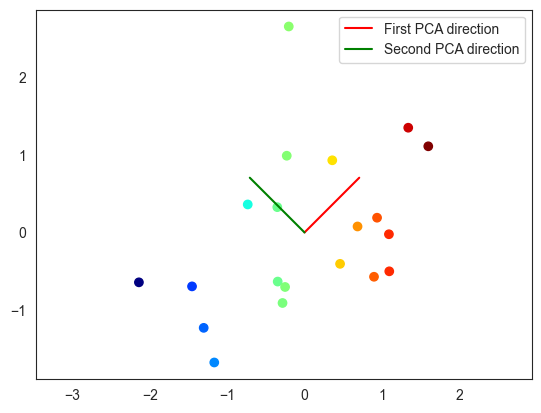

In [29]:
plt.scatter(X[:, 0], X[:, 1], color=Xcolors)
plt.plot([0, V[0, 0]], [0, V[1, 0]], "r", label='First PCA direction')
plt.plot([0, V[0, 1]], [0, V[1, 1]], "g", label='Second PCA direction')
plt.legend()
_ = plt.axis("equal")

Rotate the data into PCA space

In [30]:
XPCA = X @ V
GPCA = G @ V
VPCA = V.T @ V  # this will be the identity matrix!!

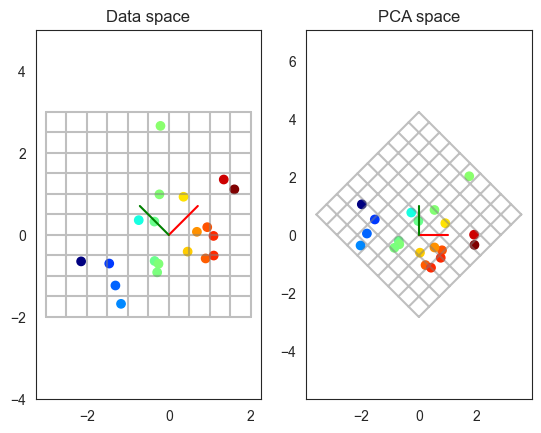

In [31]:
plt.subplot(121)
plt.axis("equal")
plt.title("Data space")
plt.plot(G[:, 0], G[:, 1], color="gray", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], color=Xcolors)
plt.plot([0, V[0, 0]], [0, V[1, 0]], "r")
plt.plot([0, V[0, 1]], [0, V[1, 1]], "g")
plt.axis("equal")


plt.subplot(122)
plt.axis("equal")
plt.title("PCA space")
plt.plot(GPCA[:, 0], GPCA[:, 1], color="gray", alpha=0.5)
plt.scatter(XPCA[:, 0], XPCA[:, 1], color=Xcolors)
plt.plot([0, VPCA[0, 0]], [0, VPCA[1, 0]], "r")
plt.plot([0, VPCA[0, 1]], [0, VPCA[1, 1]], "g")
_ = plt.axis("equal")

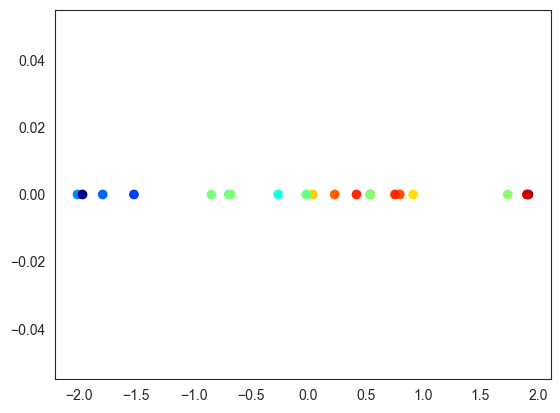

In [32]:
# Now project the data onto only the first principal component
X1D = X @ V[:, 0]
plt.scatter(X1D, np.zeros_like(X1D), color=Xcolors)

## PCA as lossy-compression of data

The 1D projection of the data can be treated as a form of lossy compression.

We can get further insights into its operation by noticing, that it is equivalent to doing a rotation of th edata using the full $V$ matrix, then zeroing the coordinates coresponding to the $D-K$ smallest eigenvalues. Define $I_K$ to be a diagonal matrix with $K$ ones on the diagonal followed by $D-K$ zeros. The projection and zeroing of componenets can thus be written as:

$$
C_K = X V I_K
$$
where $C_K$ standes for K-diensional enCoding of the data $X$.

Finally, we can rotate $C_K$ back into the orignal data space by multiplying it by $V^T$ to optain $X_K$ - a lossy reconstruction of $X$ by keeping only the $K$ first PCA components.

$$
X_K = C_K V^T
$$

Please notice the similarity to the matrix factorization interpretation of K-Means. Again, we are approximating $X$ by a product of two matrices: $C_K$ and $V$. This time, however, the constraint is that only the first $K$ dimensions of $C_K$ are allowed to be non-zero for each sample - we are in fact doing a low rank factorization of the data matrix. It can be shown using the properties of the SVD decomposition that keeping the first $K$ PCA componenets gives us the best rank-K factorization of the data matrix.

Thus we can again interpret PCA as choosing a dictionary of first $K$ principal componenets that we use to encode the data. however, due to the special structure of the eigenvectors, finding optimal encodings of data is just a linear projection.

To see the coding and encding in action ltes look at the demo below:

In [33]:
# Project the data onto the principal componenet, then zero out the second one
X1PCA = X @ V @ np.diag([1, 0])

# project the first principal component back into the data space to reconstruct the data
X_REC = X1PCA @ V.T

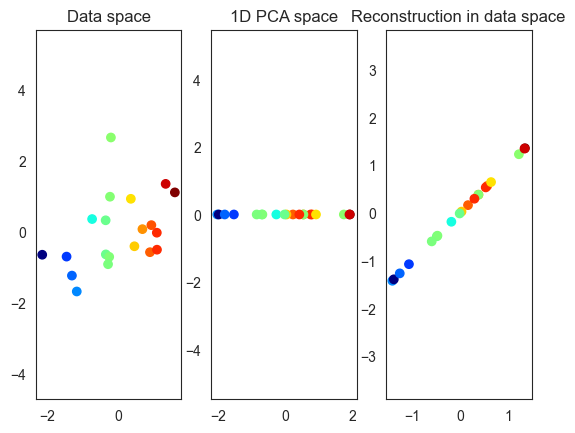

In [34]:
plt.subplot(131)
plt.axis("equal")
plt.title("Data space")
plt.scatter(X[:, 0], X[:, 1], color=Xcolors)
plt.axis("equal")

plt.subplot(132)
plt.axis("equal")
plt.title("1D PCA space")
plt.scatter(X1PCA[:, 0], X1PCA[:, 1], color=Xcolors)
_ = plt.axis("equal")

plt.subplot(133)
plt.axis("equal")
plt.title("Reconstruction in data space")
plt.scatter(X_REC[:, 0], X_REC[:, 1], color=Xcolors)
_ = plt.axis("equal")

In [35]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Download MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')



In [36]:
X_mnist, y_mnist = mnist.data.astype(float) / 255.0, mnist.target.astype(int)

# Step 2: Logistic Regression on the original data
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
original_accuracy = lr.score(X_test, y_test)
print(f"Accuracy on original data: {original_accuracy:.4f}")



Accuracy on original data: 0.9203


/Users/marek-ext/MOJE/ml_uwr_23/.ml_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Step 3: Perform PCA with dimensions=12
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



In [38]:
pca.explained_variance_ratio_

array([0.09758723, 0.07155354, 0.06171034, 0.05394776])

In [39]:
pca.explained_variance_ratio_.cumsum()

array([0.09758723, 0.16914077, 0.23085111, 0.28479887])

In [40]:
# Step 4: Logistic Regression on the reduced data
lr_pca = LogisticRegression(max_iter=100)
lr_pca.fit(X_train_pca, y_train)
pca_accuracy = lr_pca.score(X_test_pca, y_test)
print(f"Accuracy after PCA: {pca_accuracy:.4f}")

Accuracy after PCA: 0.5765


# ZCA transformation

**This material will not be covered during the lecture**

We can think of PCA as of a rigid rotation of the data. In the PCA space the marginal variances are different for each axis (they correspond to the eigenvalues).

We can normalize the variances in the PCA space to have unit variance along each axis by dividing by the square root of the eigenvalues. This procedure is called [`whitening`](https://en.wikipedia.org/wiki/Whitening_transformation) and results in a data representation which resembles white noise (all features are normalized to have mean zero, unit variance and are uncorrelated). 

The PCA whitening is not the only possible one. In fact, any rotation of the whitened features will also be white! ZCA (Zero-phase Component Analysis) searches for a transformation $Z$ such that $XZ$ is whitened (decorrelated) and $XZ$ is the closest to $X$ in the least squares sense.

ZCA is derived from the PCA:
1. Do PCA whitening: rotate data into PCA space (multiply by $V$, then normalize variances (divide by square root of eigenvalues).
2. Rotate back into the original space (multiply by $V^T$).

$Z = V \Lambda^{-1/2} V^T$

Note: $Z$ is symmetric, i.e. $Z=Z^T$

In [41]:
Z = V @ (np.diag(1.0 / (np.sqrt(L) + 1e-4))) @ V.T
ZZ = np.linalg.inv(Z)

XZCA = X @ Z
GZCA = G @ Z
ZZCA = ZZ @ Z  # note: this is the identity matrix!

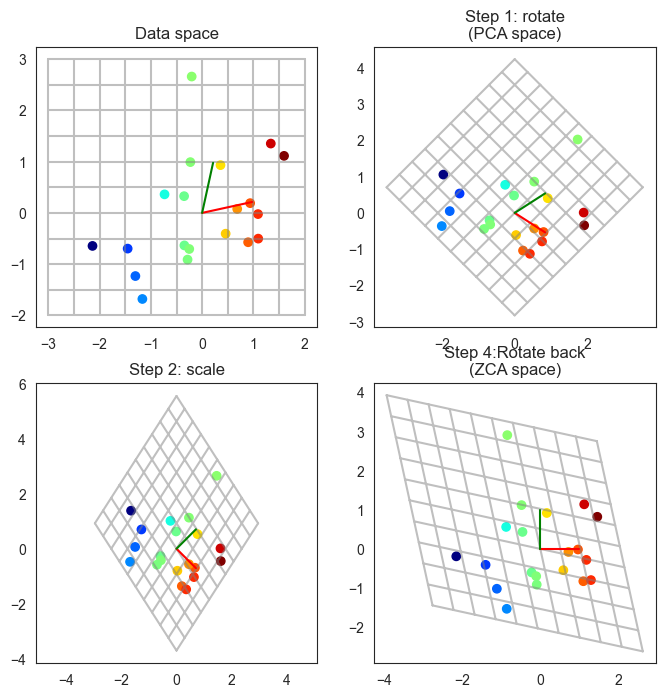

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title("Data space")
plt.plot(G[:, 0], G[:, 1], color="gray", alpha=0.5)
plt.plot([0, ZZ[0, 0]], [0, ZZ[1, 0]], "r")
plt.plot([0, ZZ[0, 1]], [0, ZZ[1, 1]], "g")
plt.scatter(X[:, 0], X[:, 1], color=Xcolors)
plt.axis("equal")

plt.subplot(222)
plt.title("Step 1: rotate\n(PCA space)")
X1 = X @ V
G1 = G @ V
ZZ1 = V.T @ ZZ
plt.plot(G1[:, 0], G1[:, 1], color="gray", alpha=0.5)
plt.plot([0, ZZ1[0, 0]], [0, ZZ1[1, 0]], "r")
plt.plot([0, ZZ1[0, 1]], [0, ZZ1[1, 1]], "g")
plt.scatter(X1[:, 0], X1[:, 1], color=Xcolors)
plt.axis("equal")

plt.subplot(223)
plt.title("Step 2: scale")
X2 = X1 @ np.diag(1.0 / (np.sqrt(L) + 1e-4))
G2 = G1 @ np.diag(1.0 / (np.sqrt(L) + 1e-4))
ZZ2 = np.diag(1.0 / (np.sqrt(L) + 1e-4)) @ ZZ1
plt.plot(G2[:, 0], G2[:, 1], color="gray", alpha=0.5)
plt.plot([0, ZZ2[0, 0]], [0, ZZ2[1, 0]], "r")
plt.plot([0, ZZ2[0, 1]], [0, ZZ2[1, 1]], "g")
plt.scatter(X2[:, 0], X2[:, 1], color=Xcolors)
plt.axis("equal")


plt.subplot(224)
plt.title("Step 4:Rotate back\n(ZCA space)")
plt.plot(GZCA[:, 0], GZCA[:, 1], color="gray", alpha=0.5)
plt.scatter(XZCA[:, 0], XZCA[:, 1], color=Xcolors)
plt.plot([0, ZZCA[0, 0]], [0, ZZCA[1, 0]], "r")
plt.plot([0, ZZCA[0, 1]], [0, ZZCA[1, 1]], "g")
_ = plt.axis("equal")

ZCA Whitening is useful for images: the transformed images have decorrelated pixels, yet are close (in the L2 sense) to the original images.

In [43]:
!pip install -q gdown httpimport

![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [44]:
with np.load("mnist.npz") as data:
    mnist_train_X_flat = data["train_data"].astype(float).reshape(-1, 28 * 28) / 256.0
mnist_train_X_flat_norm = mnist_train_X_flat - mnist_train_X_flat.mean(
    axis=0, keepdims=True
)

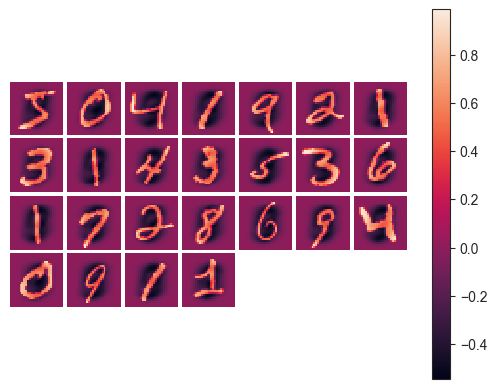

In [45]:
plot_mat(
    mnist_train_X_flat_norm[:25].reshape(-1, 1, 28, 28),
    scaleIndividual=False,
    colorbar=True,
)

In [46]:
S = (
    mnist_train_X_flat_norm.T
    @ mnist_train_X_flat_norm
    / mnist_train_X_flat_norm.shape[0]
)
S.shape

(784, 784)

Text(0.5, 1.0, 'ZCA Whitened MNIST - note that it looks like edges!')

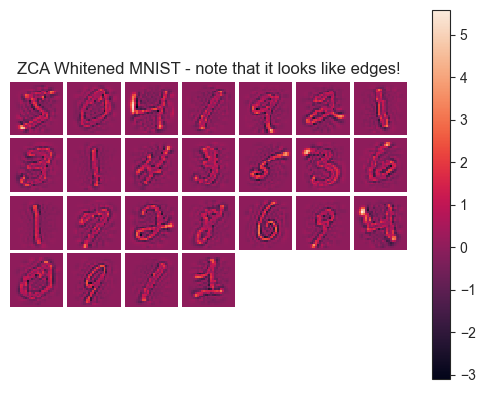

In [47]:
L, V = np.linalg.eig(S)
# Discard the imaginary component - it is there only due to numerical issues
L = np.real(L)
V = np.real(V)
eigorder = L.argsort()[::-1]
L = L[eigorder]
V = V[:, eigorder]

L[L < 1e-2] = 1.0  # note- the zero eigenvalues cause a problem!

Z = V @ (np.diag(1.0 / (np.sqrt(L)))) @ V.T

mnist_ZCA = mnist_train_X_flat_norm @ Z

plot_mat(mnist_ZCA[:25].reshape(-1, 1, 28, 28), scaleIndividual=False, colorbar=True)
plt.title("ZCA Whitened MNIST - note that it looks like edges!")

## PCA demo on real data

### Iris dataset

In [48]:
iris = sklearn.datasets.load_iris()
irisX = iris.data
irisY = iris.target

L= [2.91849782 0.91403047 0.14675688 0.02071484] 
V= [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


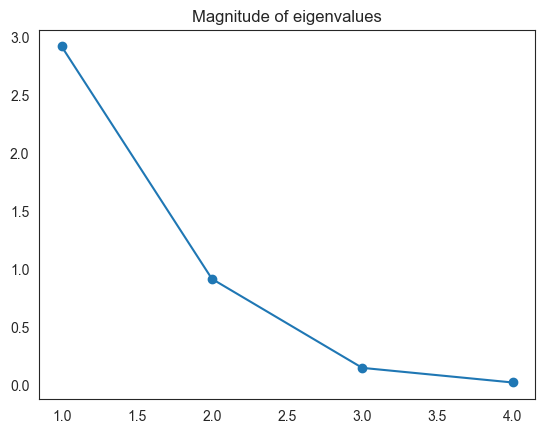

In [49]:
irisX -= irisX.mean(0, keepdims=True)
irisX /= irisX.std(0, keepdims=True)

S = irisX.T @ irisX / irisX.shape[0]
L, V = np.linalg.eig(S)
eigorder = L.argsort()[::-1]
L = L[eigorder]
V = V[:, eigorder]
print("L=", L, "\nV=", V)
plt.title("Magnitude of eigenvalues")
_ = plt.plot(np.arange(L.shape[0]) + 1, L, "-o")

In [50]:
# keep only 2 eigenvectors:
LK = L[:2]
VK = V[:, :2]

In [51]:
VK.shape

(4, 2)

In [52]:
irisX.shape

(150, 4)

Text(0.5, 1.0, 'Projection of IRIS onto first two principal components')

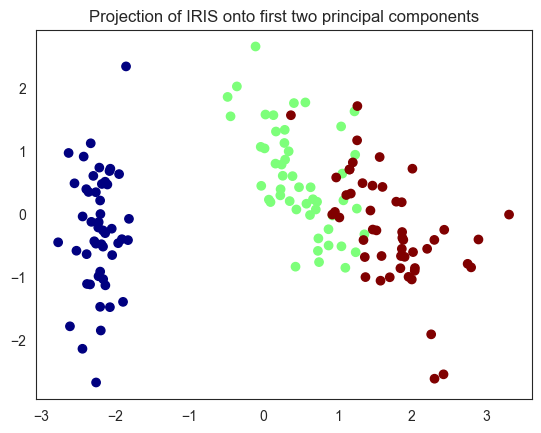

In [53]:
irisX = irisX @ VK

plt.scatter(irisX[:, 0], irisX[:, 1], c=irisY, cmap="jet")
plt.title("Projection of IRIS onto first two principal components")

### Simple faces

Let's now apply PCA to a small dataset of face images. First, download them.

In [54]:
F = sklearn.datasets.fetch_olivetti_faces().data
F = F - F.mean(1, keepdims=True)
F.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/marek-ext/scikit_learn_data


(400, 4096)

The faces dataset pose an interesting challenge: the data has more dimensions (4096), than samples (400). 

A straigthforward application of PCA will force us to first compute the data covariance matrix, of shape 4096 x 4096. It may not seem like much, but consider using colorful photographs take using a megapixel camera: the data covariance matrix will be huge even for datasets with only a few pictures.

We can also notice that the data covariance matrix is not full rank. It will have only 400 (its rank) nozero eigenvalues. Thus computing the large datacovariance matrix seems wasteful. How we can resolve it?

Instead of the data covariance matrix $S = \frac{1}{N}X^T X \in \R^{D \times D}$ we will use the matrix $s = \frac{1}{N} X X^T \in \R^{N\times N}$ where we have used the lowercase $s$ to indicate that in this case it is much _smaller_.

Consider an eigenvalue $\lambda_i$ and eigenvector $v_i$ of $S$:
$$
\begin{align}
S v_i &= \lambda_i v_i \\
\frac{1}{N}X^T X v_i &= \lambda_i v_i \\
\frac{1}{N}X X^T (X v_i) &= \lambda_i (X v_i) \\
\frac{1}{N}X X^T u_i &= \lambda_i u_i \\
s u_i &= \lambda_i u_i
\end{align}
$$

where we have used $u_i = X v_i$. 

It follows that if $\lambda_i$ is an eigenvalue of $S$, it is also an eigenvalue of $s$ with $u_i$ being the (unnormalized) eigenvector! Intuitively, it makes sense, both $S$ and $s$ have the same rank (400 for the Olivetti faces) and $S$ only has 400 non-zero eigevalues - the eigenvalues of $s$.

Thus instead of computing $S$ and performing an eigendecomposition on it, we can instead compute and decompose $s$. The only question is how to recover $v_i$ fro $u_i$? Let's try multiplying by $X^T$ this time:
$$
\begin{align}
s u_i &= \lambda_i u_i \\
\frac{1}{N}X X^T u_i &= \lambda_i u_i \\
\frac{1}{N}X^T X (X^T u_i) &= \lambda_i (X^T u_i) \\
S (X^T u_i) &= \lambda_i (X^T u_i)
\end{align}
$$

We can conclude that $v_i$, the eigenvector corresponding to $\lambda_i$ is $X^T u_i$ scaled to unit length: 
$$
v_i = \beta_i X^T u_i
$$

We can solve for a $\beta_i$ such that $\|v_i\|=1$ obtaining:
$$
v_i = \frac{1}{\sqrt{N\lambda_i}}X^T u_i
$$

Thus, to perform PCA on a dataset with more features than samples we can compute the small matrix $s$, find its eigen-decomposition, then recover the eigenvectors of the data correlation matrix $S$!

Let's apply this procedure to the face data.

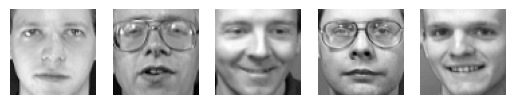

In [55]:
# First plot the data
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(F[i * 10, :].reshape((64, 64)), cmap="gray")
    plt.axis("off")

In [56]:
# Now compute the small matrix s
s = F @ F.T / F.shape[0]
s.shape

(400, 400)

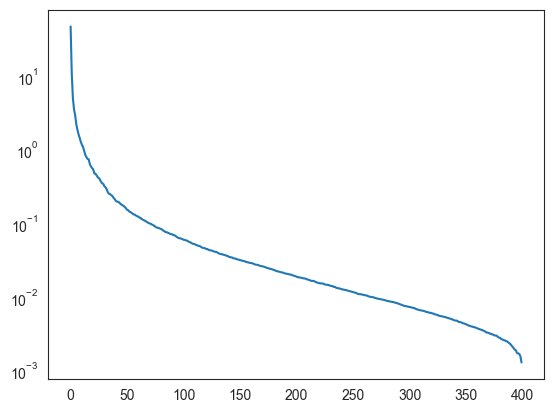

In [57]:
L, U = np.linalg.eig(s)
L = np.real(L)
U = np.real(U)  # discard imaginary parts that are due to numerical errors
eigorder = L.argsort()[::-1]
L = L[eigorder]
U = U[:, eigorder]

_ = plt.semilogy(L)

In [58]:
# Now keep the forst K eigenvectors
K = 50
LK = L[:K]
UK = U[:, :K]

# and recover the eigenvectors of S
VK = F.T @ (UK @ (np.diag(1.0 / np.sqrt(F.shape[0] * LK))))

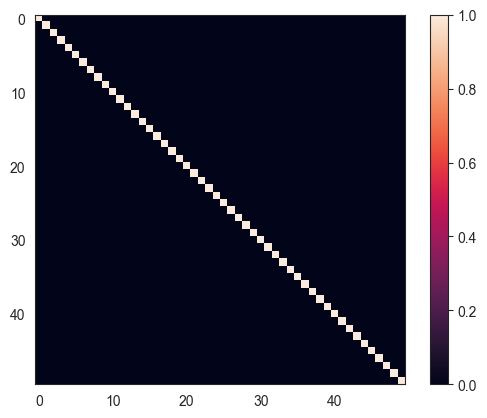

In [59]:
# Check that the columns of VK are indeed orthonormal
plt.imshow(VK.T @ (VK), interpolation="nearest")
plt.colorbar()

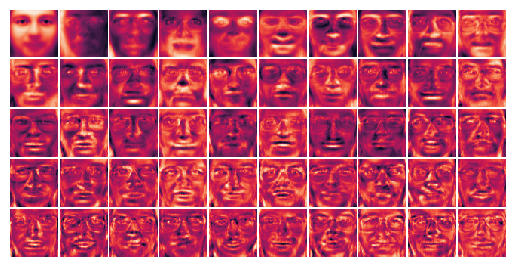

In [60]:
from common.plotting import plot_mat

plot_mat(VK.T.reshape(-1, 1, 64, 64))

Now project faces to the dim spanned by first three eigenvectors and color them by the identity of the person.

Faces of the same person tend to be closer - this method of face recognition, called eigen-faces, was one of the first attempts and machine learning for face recognition. Please note that it is very innacurate, and deep-learning based solutions are much more powerful!

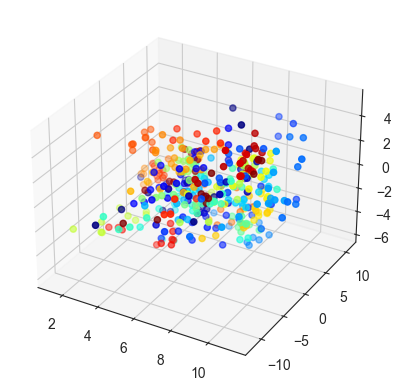

In [61]:
from mpl_toolkits.mplot3d import Axes3D

FPCA = F @ VK[:, :3]
ax = plt.figure().add_subplot(111, projection="3d")
ax.scatter(
    FPCA[:, 0],
    FPCA[:, 1],
    FPCA[:, 2],
    c=np.floor(np.arange(400.0) / 10),
    cmap=plt.cm.jet,
)

# PCA on financial data

In [62]:
!pip install ccxt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [72]:
import ccxt
import pandas as pd
from datetime import datetime, timedelta

# Initialize the exchange
exchange = ccxt.binance()

# List of specific cryptocurrencies to analyze
cryptocurrencies = ['BTC', 'ETH', 'BNB', 'SOL', 'ADA', 'AVAX', 'DOGE', 'TRX', 'LINK']

# Create an empty DataFrame to hold the closing prices
df_combined = pd.DataFrame()

# Fetch and process Kline data for each cryptocurrency
for crypto in cryptocurrencies:
    # Forming the symbol for USD or USDT pair
    symbol = f'{crypto}/USDT'  # Most exchanges use USDT as a stand-in for USD
    # if symbol not in exchange.symbols:
    #     symbol = f'{crypto}/USD'  # Fallback to USD if USDT pair is not available

    try:
        # Fetch OHLCV data for the past year
        since = exchange.parse8601((datetime.now() - timedelta(days=365)).isoformat())
        ohlcv = exchange.fetch_ohlcv(symbol, '1d', since=since)

        # Convert to DataFrame
        df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)

        # Keep only the 'close' column and rename it
        df = df[['close']]
        df.rename(columns={'close': crypto}, inplace=True)

        # Merge with the combined DataFrame
        if df_combined.empty:
            df_combined = df
        else:
            df_combined = df_combined.join(df, how='outer')
    except Exception as e:
        print(f"Error fetching data for {crypto}: {e}")

# Display the combined DataFrame
print(df_combined)


                 BTC      ETH    BNB    SOL     ADA   AVAX     DOGE      TRX  \
timestamp                                                                      
2022-12-18  16738.21  1183.06  251.0  12.38  0.2659  11.93  0.07847  0.05378   
2022-12-19  16438.88  1167.82  240.4  11.94  0.2529  11.39  0.07133  0.05356   
2022-12-20  16895.56  1216.94  251.4  12.26  0.2587  11.95  0.07483  0.05497   
2022-12-21  16824.67  1213.78  246.2  12.14  0.2534  11.71  0.07374  0.05492   
2022-12-22  16821.43  1217.71  245.8  11.82  0.2566  11.85  0.07685  0.05554   
...              ...      ...    ...    ...     ...    ...      ...      ...   
2023-12-13  42869.03  2260.16  252.0  70.62  0.6675  38.99  0.09642  0.10430   
2023-12-14  43022.26  2315.32  253.3  75.68  0.6433  39.30  0.09830  0.10600   
2023-12-15  41940.30  2220.50  244.9  72.51  0.6004  39.71  0.09303  0.10156   
2023-12-16  42278.03  2228.96  244.4  73.72  0.6078  42.22  0.09713  0.10282   
2023-12-17  42000.01  2239.49  243.1  73

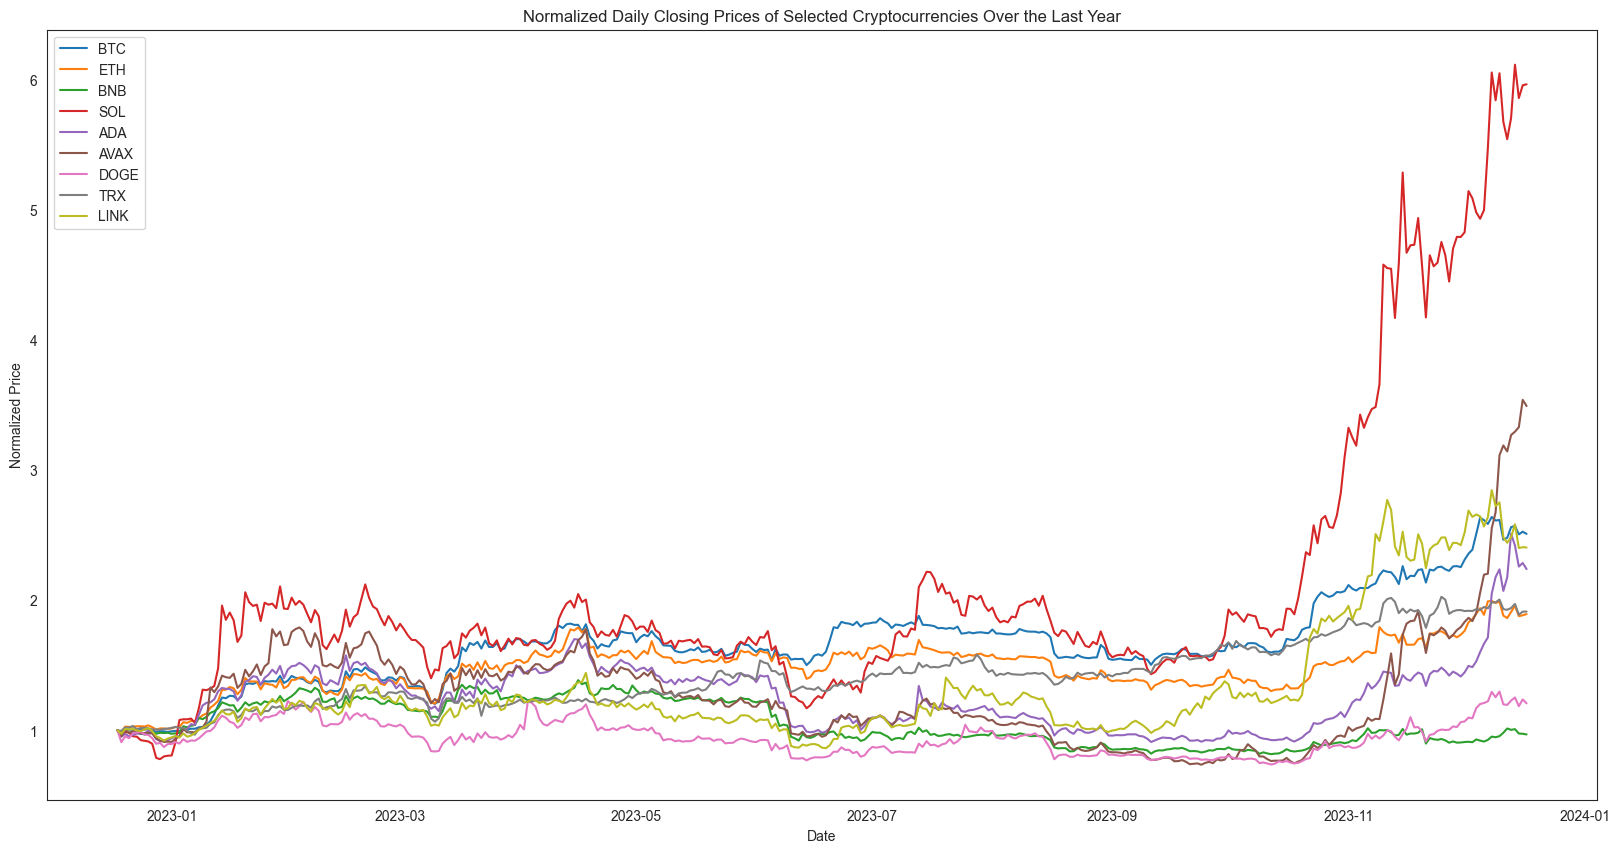

In [73]:
import matplotlib.pyplot as plt

# Normalize each column so that the initial price is 1
df_normalized = df_combined / df_combined.iloc[0]

# Prepare for plotting
plt.figure(figsize=(20, 10))

# Plot each cryptocurrency
for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], label=column)

# Customize plot
plt.legend()
plt.title("Normalized Daily Closing Prices of Selected Cryptocurrencies Over the Last Year")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.show()


In [74]:
#df_daily_changes[BTC][t] = (df_daily_changes[BTC][t]- df_daily_changes[BTC][t-1])/df_daily_changes[BTC][t-1]

rets_df = pd.DataFrame()
for instrument in df_normalized.columns:
  rets_df[instrument] = (df_normalized[instrument] - df_normalized[instrument].shift(1))/df_normalized[instrument].shift(1)
rets_df = rets_df.drop(index=rets_df.index[0])
rets_df.head(n=10)

,BTC,ETH,BNB,SOL,ADA,AVAX,DOGE,TRX,LINK
timestamp,,,,,,,,,
2022-12-19,-0.017883,-0.012882,-0.042231,-0.035541,-0.048891,-0.045264,-0.090990,-0.004091,-0.026727
2022-12-20,0.027780,0.042061,0.045757,0.026801,0.022934,0.049166,0.049068,0.026326,0.038515
2022-12-21,-0.004196,-0.002597,-0.020684,-0.009788,-0.020487,-0.020084,-0.014566,-0.000910,-0.003991
2022-12-22,-0.000193,0.003238,-0.001625,-0.026359,0.012628,0.011956,0.042175,0.011289,0.002672
2022-12-23,-0.002552,0.001872,0.001627,-0.003384,0.010912,-0.005063,0.004684,-0.023587,-0.010658
2022-12-24,0.003434,0.000344,-0.006905,-0.028014,-0.000771,-0.010178,0.004015,0.009220,-0.004208
2022-12-25,-0.000238,-0.001557,-0.005317,-0.006114,-0.000386,0.000857,-0.019866,0.001462,0.012508
2022-12-26,0.005185,0.007878,0.004523,-0.005272,0.023543,0.002568,-0.003948,-0.004014,0.009683
2022-12-27,-0.012591,-0.013484,0.009824,-0.020318,-0.018477,-0.005978,-0.025899,-0.008060,-0.023975


<Axes: xlabel='BTC', ylabel='ETH'>

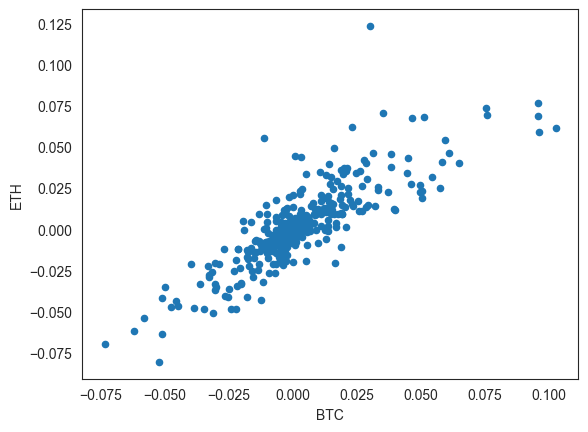

In [75]:
rets_df.plot.scatter(x = 'BTC',y = 'ETH')

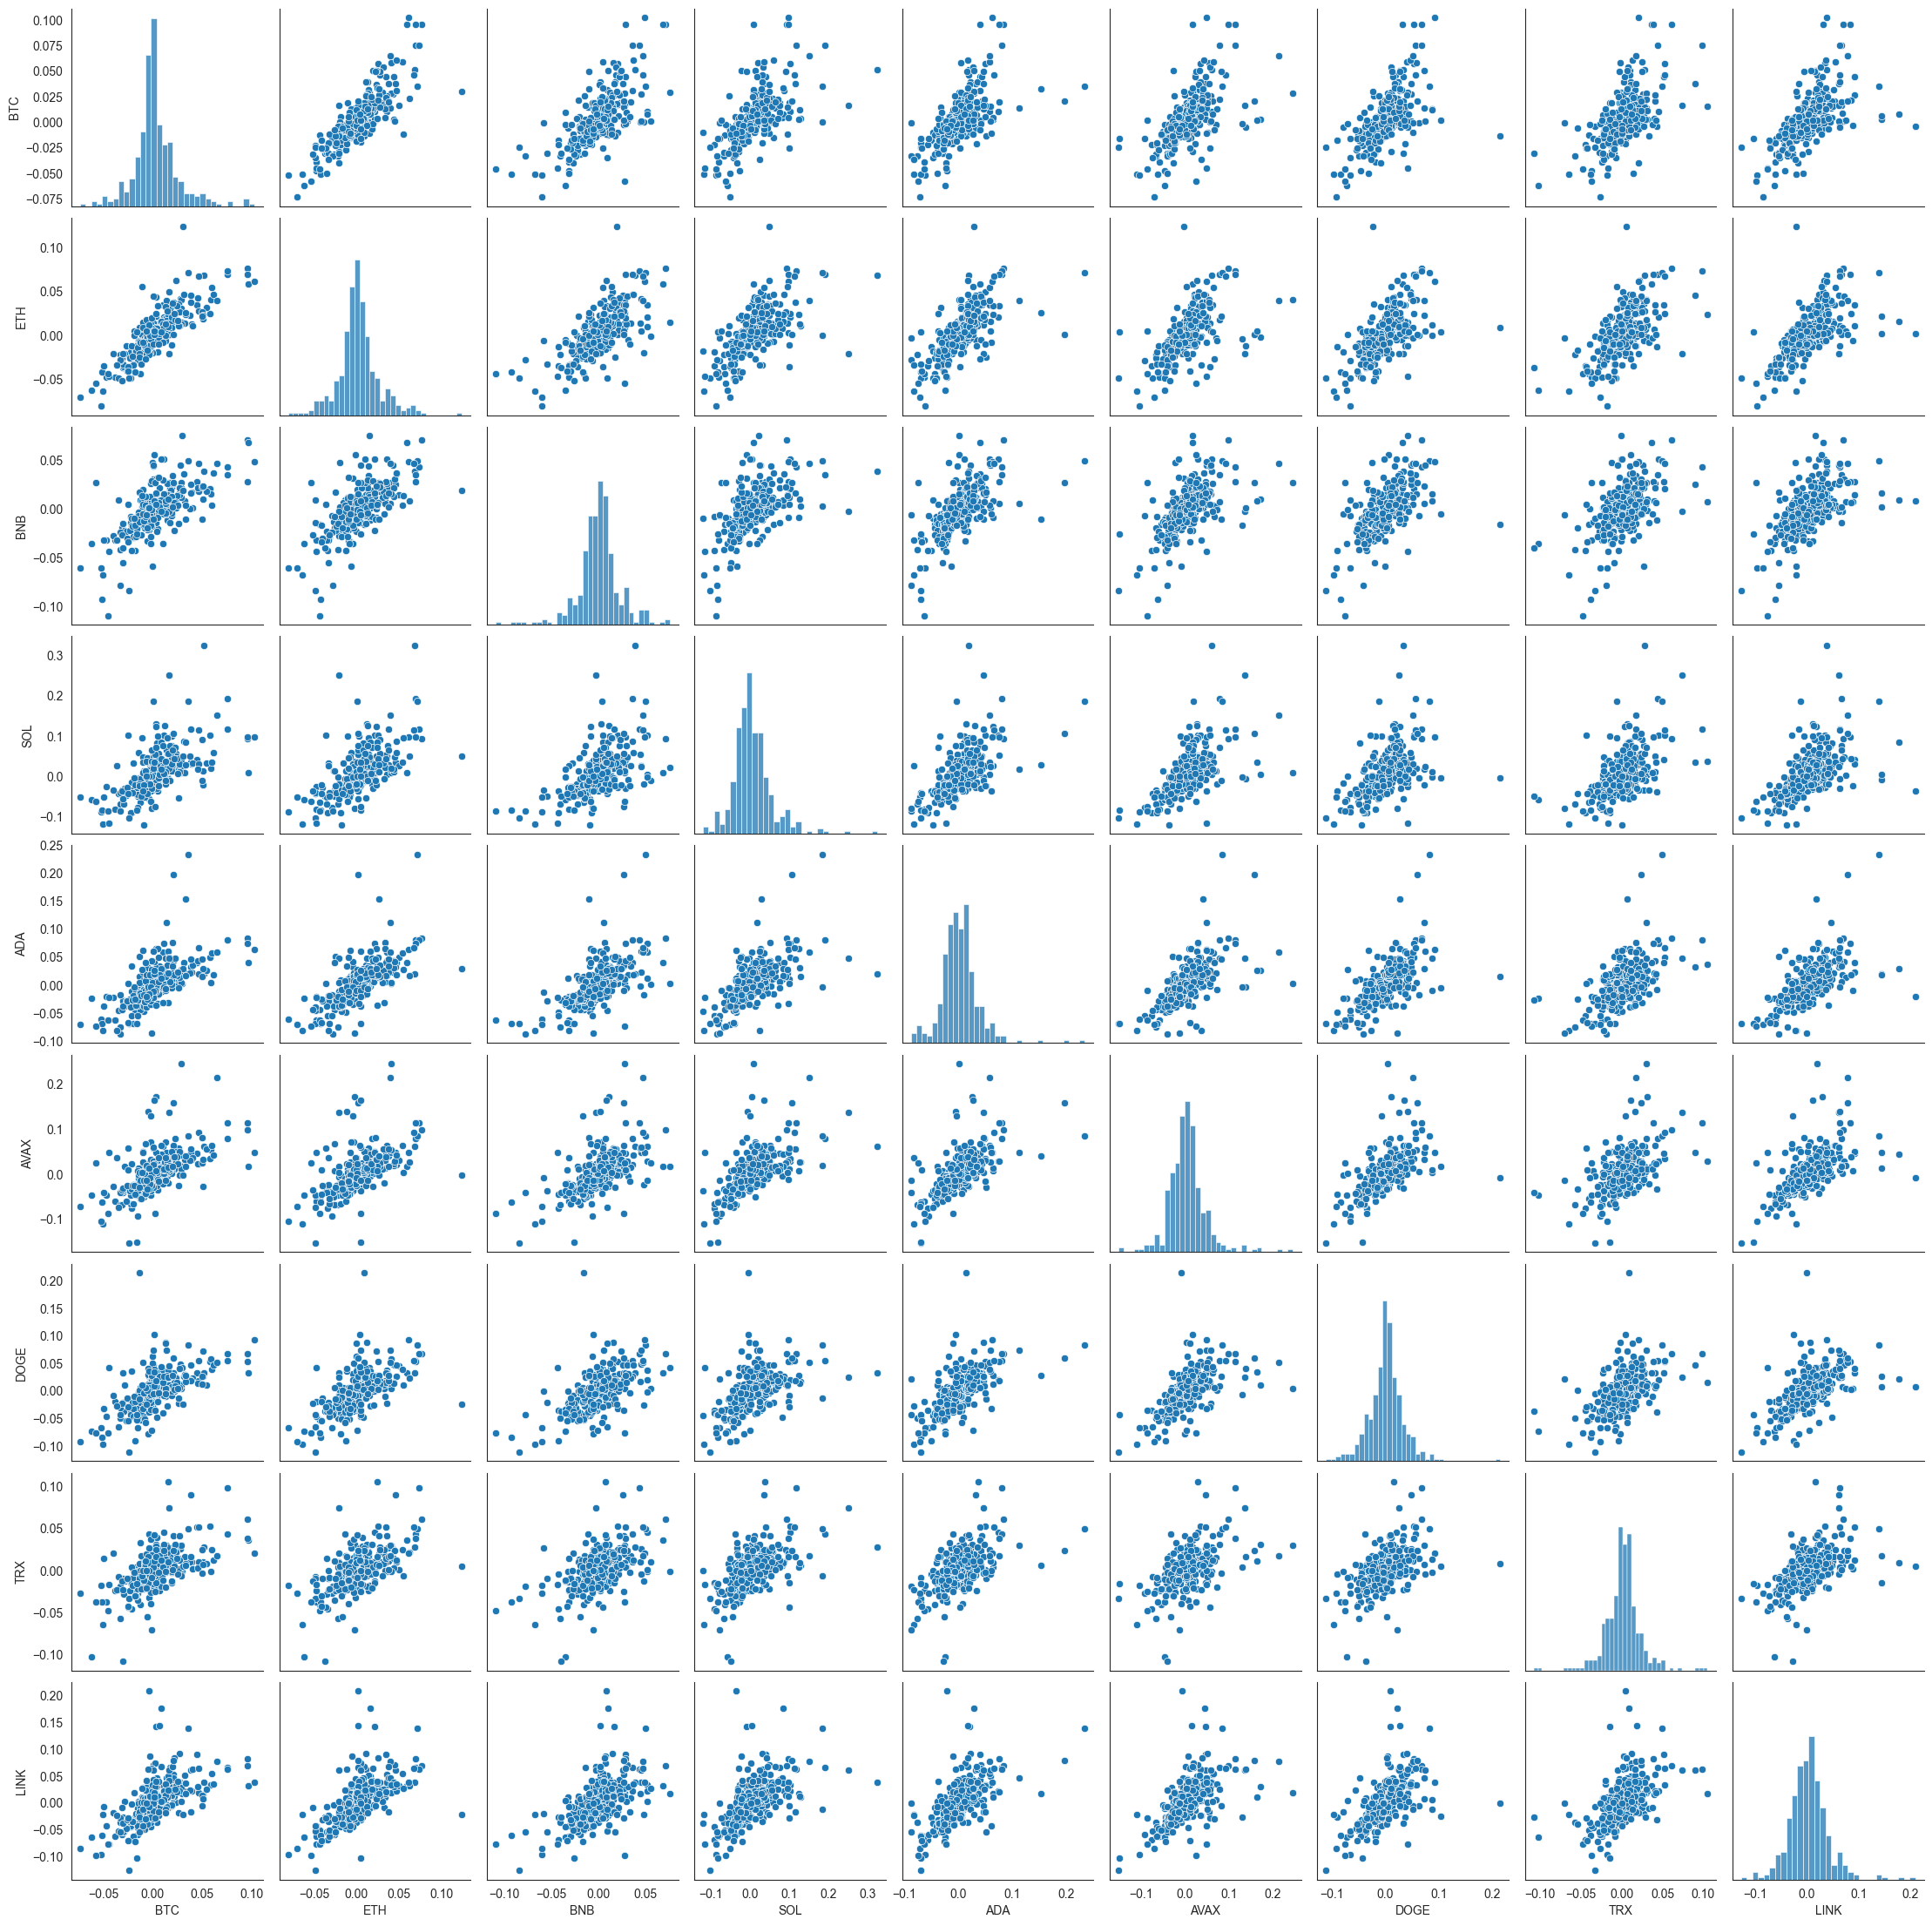

In [76]:
import seaborn as sns

# Dropping rows with NaN values as pairplot does not handle NaNs well

# Creating the pairplot
sns.pairplot(rets_df)

# Display the plot
plt.show()


Clearly there's a lot of correlation between the daily relative prices. Let's measure it:

In [77]:
corr_matrix = rets_df.corr()

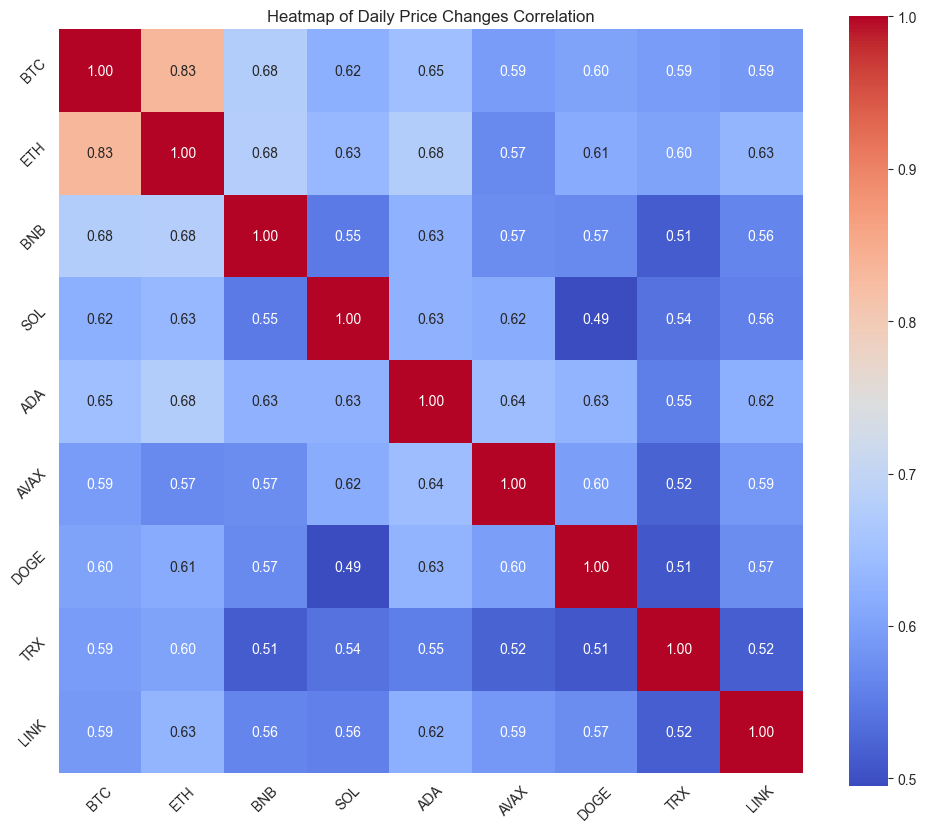

In [78]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True)

# Add titles and labels
plt.title('Heatmap of Daily Price Changes Correlation')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

A lot of correlation indeed. What would PCA yield in this case?

In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


# Applying PCA
pca = PCA(n_components=1) 
pca.fit(rets_df)


PCA(n_components=1)

In [91]:
pca.explained_variance_ratio_

array([0.65556262])

In [92]:
pca.explained_variance_ratio_.cumsum()

array([0.65556262])

The first PCA component explains 64% of the variance. But the most interesting part is the actual meaning of it. Let's take this first component which lives in the domain of daily returns, and let's transform it back to the domain of daily closing prices.

In [95]:
rets_df['BTC']

timestamp
2022-12-19   -0.017883
2022-12-20    0.027780
2022-12-21   -0.004196
2022-12-22   -0.000193
2022-12-23   -0.002552
                ...   
2023-12-13    0.033178
2023-12-14    0.003574
2023-12-15   -0.025149
2023-12-16    0.008053
2023-12-17   -0.006576
Name: BTC, Length: 364, dtype: float64

In [98]:
pca.transform(rets_df)

array([[-0.11823673],
       [ 0.09364908],
       [-0.04199943],
       [ 0.00276436],
       [-0.01596215],
       [-0.02783534],
       [-0.01464459],
       [ 0.00309647],
       [-0.05110061],
       [-0.14076523],
       [-0.02893469],
       [-0.01530246],
       [ 0.00978008],
       [ 0.00141398],
       [ 0.09056764],
       [ 0.08735684],
       [ 0.08526258],
       [-0.04209357],
       [ 0.01769732],
       [-0.02309695],
       [ 0.12463501],
       [ 0.10306289],
       [ 0.03965876],
       [ 0.14042388],
       [ 0.02691279],
       [ 0.13831777],
       [ 0.26065468],
       [-0.05754567],
       [ 0.00046   ],
       [-0.01983578],
       [-0.1752376 ],
       [ 0.06469396],
       [ 0.24536478],
       [-0.0604906 ],
       [ 0.02401597],
       [ 0.01713434],
       [-0.13951146],
       [ 0.11341968],
       [ 0.00694011],
       [ 0.10066244],
       [-0.05326748],
       [ 0.10366984],
       [-0.1593044 ],
       [ 0.04496596],
       [ 0.07398844],
       [-0

In [125]:
rets_pca_df = pd.DataFrame(index=rets_df.index, columns=rets_df.columns, data=pca.inverse_transform(pca.transform(rets_df)))

In [126]:
price_pca_df = (rets_pca_df+1.).cumprod()
price_pca_df

,BTC,ETH,BNB,SOL,ADA,AVAX,DOGE,TRX,LINK
timestamp,,,,,,,,,
2022-12-19,0.976696,0.973951,0.976708,0.943811,0.961069,0.952340,0.965716,0.980256,0.959520
2022-12-20,0.999604,0.997615,0.995006,0.996212,0.995541,0.995728,0.993767,0.999149,0.995690
2022-12-21,0.993127,0.989700,0.986876,0.980277,0.983577,0.981668,0.982341,0.993449,0.983391
2022-12-22,0.996502,0.992374,0.987575,0.987731,0.987299,0.987140,0.984190,0.995970,0.987485
2022-12-23,0.995771,0.990640,0.984606,0.985490,0.984508,0.984510,0.980534,0.995063,0.984774
...,...,...,...,...,...,...,...,...,...
2023-12-13,2.597487,1.971830,1.019749,6.670009,2.402062,3.871373,1.331494,2.009155,2.673994
2023-12-14,2.633833,1.999651,1.030181,6.889547,2.451861,3.974719,1.353106,2.032015,2.732490
2023-12-15,2.570323,1.945819,1.005437,6.489113,2.353234,3.778871,1.305233,1.990523,2.618182


In [127]:
pc1 = pd.Series(index=rets_df.columns, data=pca.components_[0])

In [128]:
pc1

BTC     0.220680
ETH     0.237614
BNB     0.198348
SOL     0.527211
ADA     0.353015
AVAX    0.439950
DOGE    0.298893
TRX     0.184143
LINK    0.368952
dtype: float64

In [129]:
weights = abs(pc1)/sum(abs(pc1))

In [130]:
market_rets = (weights*rets_df).sum(1)
market_rets

timestamp
2022-12-19   -0.038569
2022-12-20    0.036334
2022-12-21   -0.011619
2022-12-22    0.004205
2022-12-23   -0.002415
                ...   
2023-12-13    0.040572
2023-12-14    0.021176
2023-12-15   -0.039866
2023-12-16    0.021104
2023-12-17   -0.007645
Length: 364, dtype: float64

In [131]:
crypto_market = (market_rets+1.).cumprod()

In [132]:
crypto_market

timestamp
2022-12-19    0.961431
2022-12-20    0.996363
2022-12-21    0.984786
2022-12-22    0.988928
2022-12-23    0.986540
                ...   
2023-12-13    2.791639
2023-12-14    2.850755
2023-12-15    2.737108
2023-12-16    2.794872
2023-12-17    2.773507
Length: 364, dtype: float64

In [133]:
rets_df

,BTC,ETH,BNB,SOL,ADA,AVAX,DOGE,TRX,LINK
timestamp,,,,,,,,,
2022-12-19,-0.017883,-0.012882,-0.042231,-0.035541,-0.048891,-0.045264,-0.090990,-0.004091,-0.026727
2022-12-20,0.027780,0.042061,0.045757,0.026801,0.022934,0.049166,0.049068,0.026326,0.038515
2022-12-21,-0.004196,-0.002597,-0.020684,-0.009788,-0.020487,-0.020084,-0.014566,-0.000910,-0.003991
2022-12-22,-0.000193,0.003238,-0.001625,-0.026359,0.012628,0.011956,0.042175,0.011289,0.002672
2022-12-23,-0.002552,0.001872,0.001627,-0.003384,0.010912,-0.005063,0.004684,-0.023587,-0.010658
...,...,...,...,...,...,...,...,...,...
2023-12-13,0.033178,0.025732,-0.010212,0.029446,0.154046,0.040011,0.027822,0.006854,0.017008
2023-12-14,0.003574,0.024405,0.005159,0.071651,-0.036255,0.007951,0.019498,0.016299,0.040623
2023-12-15,-0.025149,-0.040953,-0.033162,-0.041887,-0.066687,0.010433,-0.053611,-0.041887,-0.070852


In [134]:
price_pca_df

,BTC,ETH,BNB,SOL,ADA,AVAX,DOGE,TRX,LINK
timestamp,,,,,,,,,
2022-12-19,0.976696,0.973951,0.976708,0.943811,0.961069,0.952340,0.965716,0.980256,0.959520
2022-12-20,0.999604,0.997615,0.995006,0.996212,0.995541,0.995728,0.993767,0.999149,0.995690
2022-12-21,0.993127,0.989700,0.986876,0.980277,0.983577,0.981668,0.982341,0.993449,0.983391
2022-12-22,0.996502,0.992374,0.987575,0.987731,0.987299,0.987140,0.984190,0.995970,0.987485
2022-12-23,0.995771,0.990640,0.984606,0.985490,0.984508,0.984510,0.980534,0.995063,0.984774
...,...,...,...,...,...,...,...,...,...
2023-12-13,2.597487,1.971830,1.019749,6.670009,2.402062,3.871373,1.331494,2.009155,2.673994
2023-12-14,2.633833,1.999651,1.030181,6.889547,2.451861,3.974719,1.353106,2.032015,2.732490
2023-12-15,2.570323,1.945819,1.005437,6.489113,2.353234,3.778871,1.305233,1.990523,2.618182


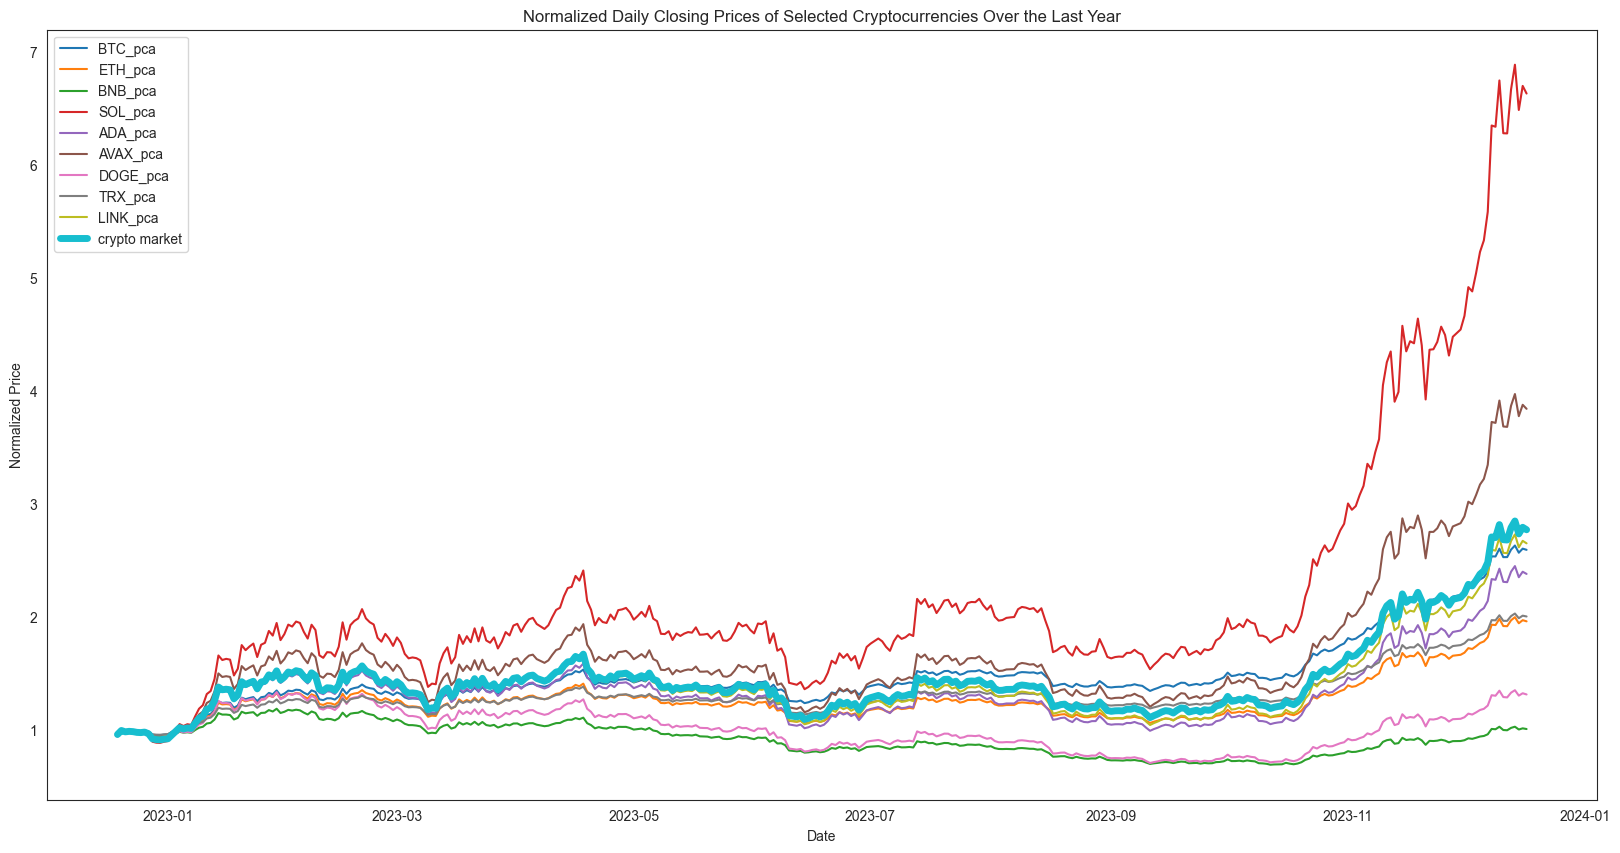

In [138]:
# Prepare for plotting
plt.figure(figsize=(20, 10))

# Plot each cryptocurrency
for column in price_pca_df.columns:
    plt.plot(price_pca_df.index, price_pca_df[column], label=column+"_pca")

plt.plot(rets_df.index, crypto_market ,label="crypto market", lw=5)
# Customize plot
plt.legend()
plt.title("Normalized Daily Closing Prices of Selected Cryptocurrencies Over the Last Year")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.show()


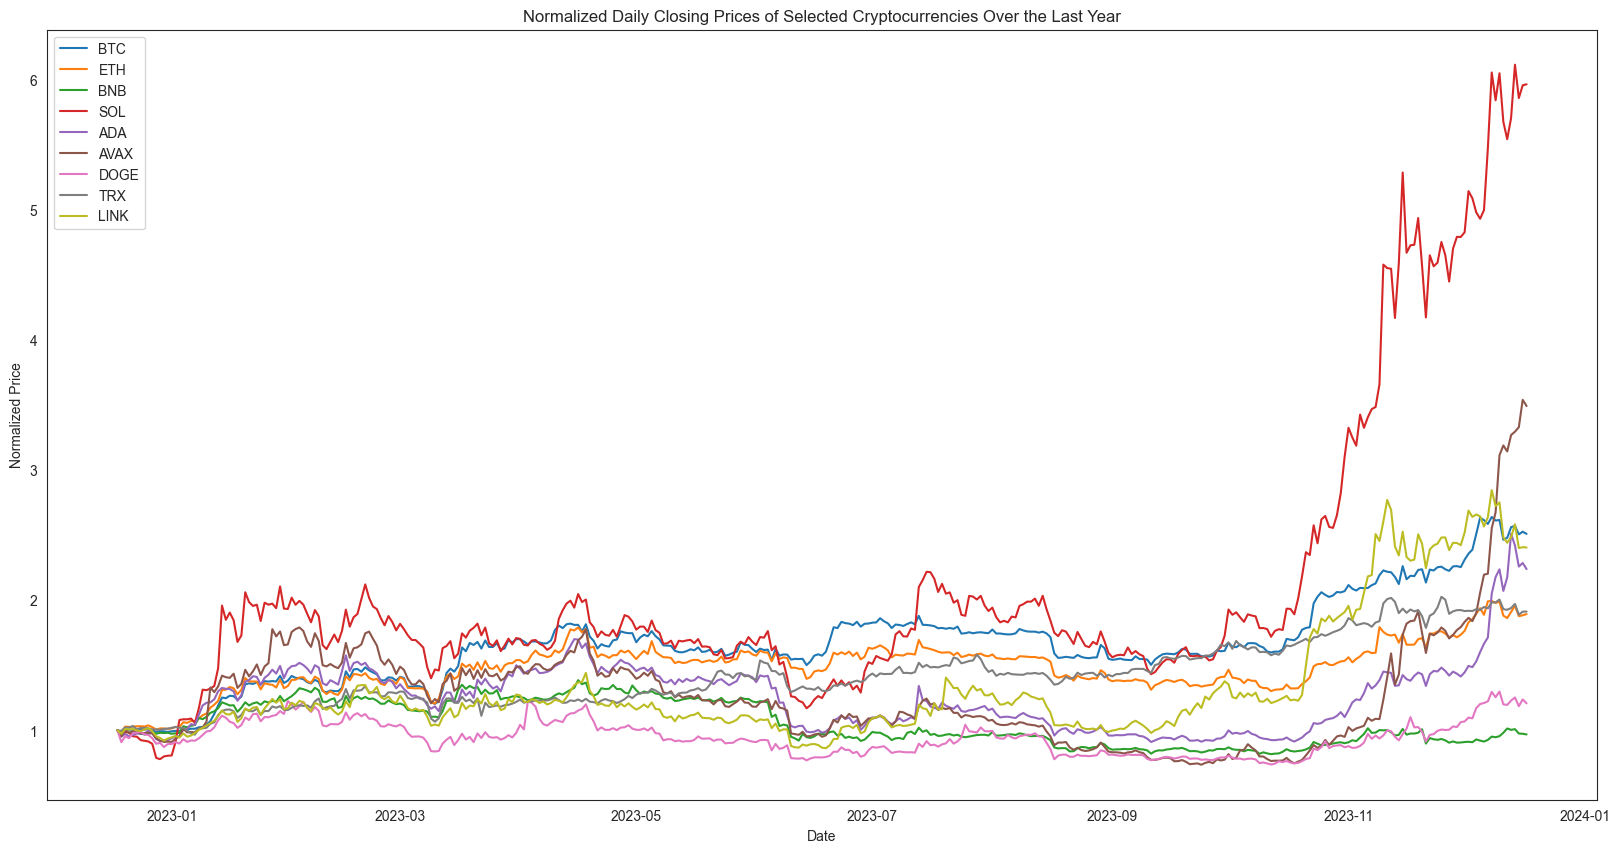

In [139]:
import matplotlib.pyplot as plt

# Normalize each column so that the initial price is 1
df_normalized = df_combined / df_combined.iloc[0]

# Prepare for plotting
plt.figure(figsize=(20, 10))

# Plot each cryptocurrency
for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], label=column)

# Customize plot
plt.legend()
plt.title("Normalized Daily Closing Prices of Selected Cryptocurrencies Over the Last Year")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.show()


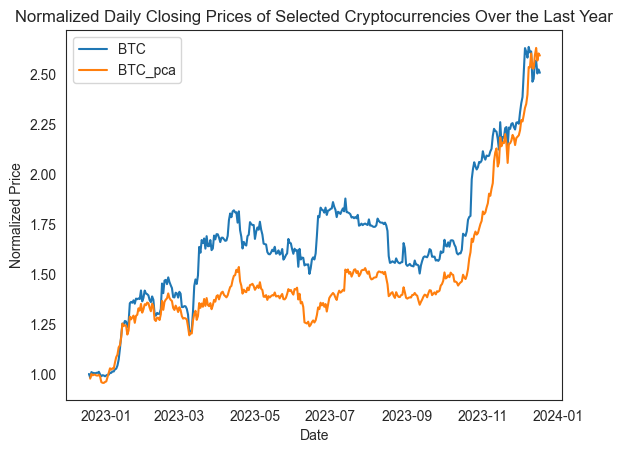

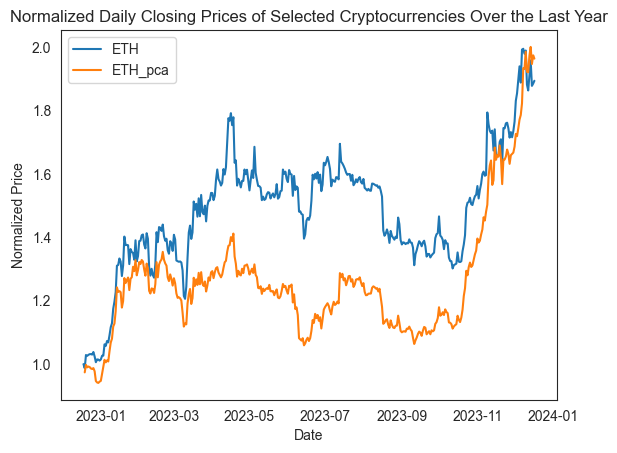

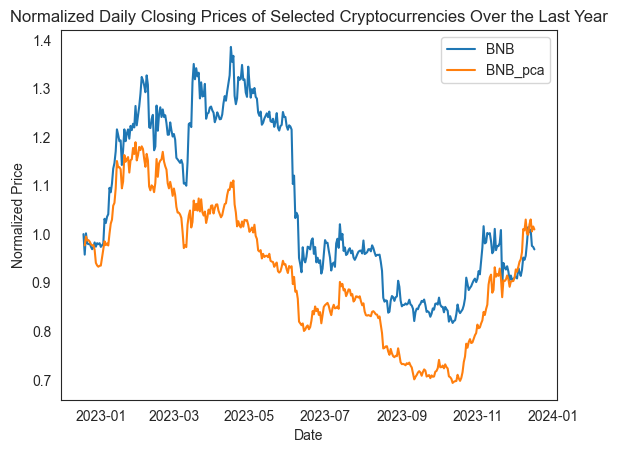

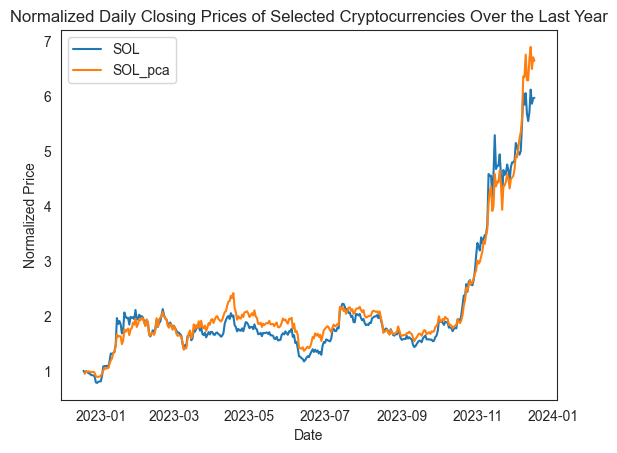

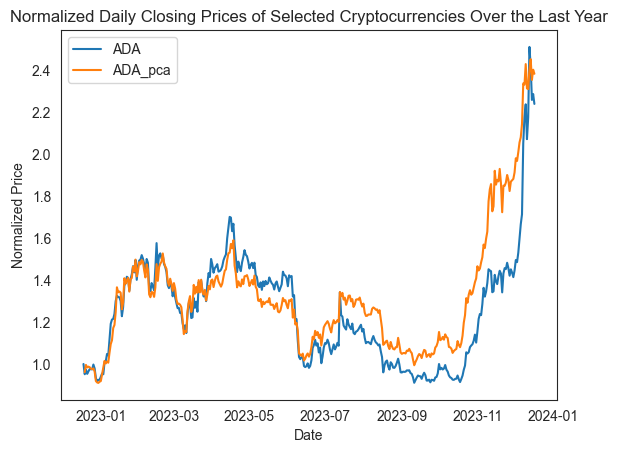

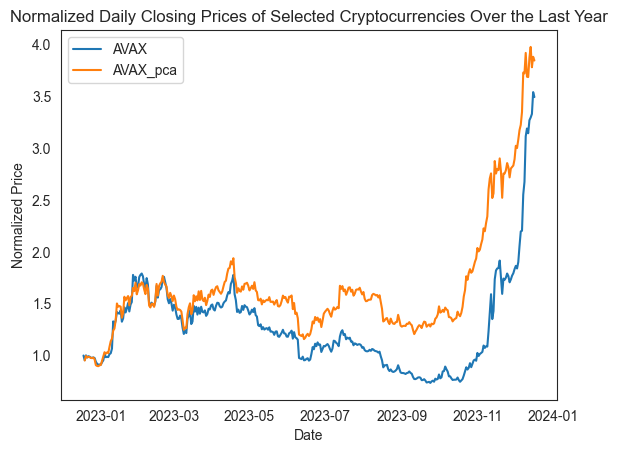

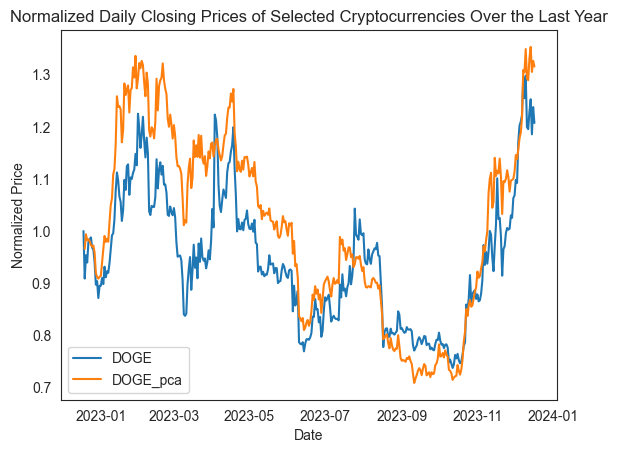

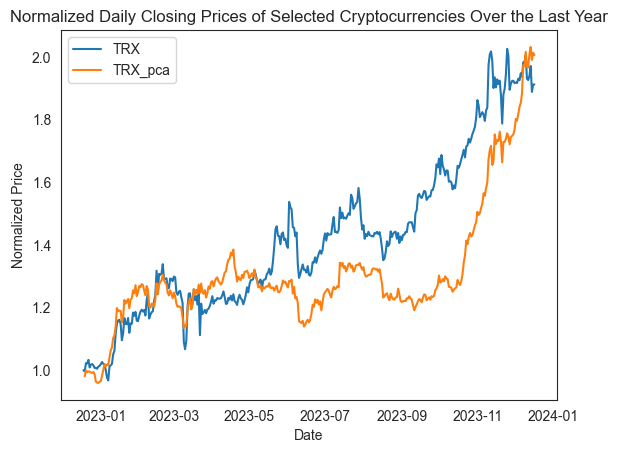

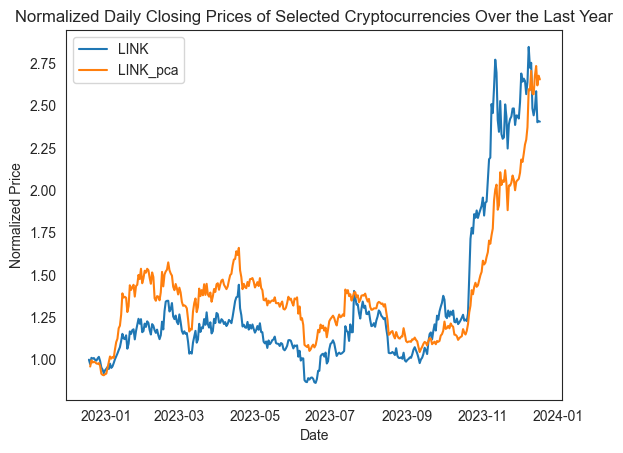

In [144]:
import matplotlib.pyplot as plt

# Normalize each column so that the initial price is 1
df_normalized = df_combined / df_combined.iloc[0]

# Prepare for plotting


# Plot each cryptocurrency
for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], label=column)
    plt.plot(price_pca_df.index, price_pca_df[column], label=column+"_pca")
    # Customize plot
    plt.legend()
    plt.title("Normalized Daily Closing Prices of Selected Cryptocurrencies Over the Last Year")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.show()



